<h1 align="center">The Battle of Neighborhoods</h1>

## Introduction

Real estate buyers searching for a new home always face big decisions. There are lots of factors effecting where to buy, such as the trend of price growth, local amenities and other factors which might make negative effects on the property value. London, the capital and largest city of England and the United Kingdom, is one of the world's most important global cities. London's population is about 9 million which accounts for 13.4% of the U.K. population. Also, London has a diverse range of people and full of different cultures. London attracts people from all over the world.  Grocery stores, restaurants, shopping, entertainment, are some of the top amenities people are looking for when buying a home. In this project we will focus on grocery stores and restaurants as factors to be included in the features being targeted. 

## Problem Description

How to decide which borough in London the property to buy? For those who want to buy real estate in London, it’s hard to know where to start.

## Taget Audience

This project aims to make an analysis of features for buyers who want to find and purchase property in London. The buyers can target at the features including local restaurants and grocery stores in each borough to decide where is the best borough to look for.

## Datasets

The datasets will include the following data:
1. <b> London boroughs </b>
    <br> Source: https://en.wikipedia.org/wiki/List_of_London_boroughs
    - The data will be scraped from web url.
    - Description: The data will be scraped from web url. Selected columns: borough, population, coordinates
<br><br>
2. <b> Foursquare location data </b>
    <br> Source: https://foursquare.com
    - Description: Retrieve the venues in each borough and filter grocery stores and restaurants.

<h1>Table of contents</h1>

<div class="alert alert-block alert-info" style="margin-top: 20px">
    <ul>
        <li style="color:black; font-size:120%">Get Data</li>
            <ol>
                <li>Get London Boroughs Data</li>
                <li>Get Foursquare Location Data</li>
                <li>London Venue Exploration</li> 
            </ol>
        <br>
        <li style="color:black; font-size:120%">London Mapping</li>
        <br>
        <li style="color:black; font-size:120%">Data Exploratory</li>
        <br>
        <li style="color:black; font-size:120%">Clustering</li> 
    </ul>
</div>
<br>
<hr>


In [1]:
# For manipulation and web scraping
!pip install bs4
import pandas as pd
import numpy as np
import requests
from bs4 import BeautifulSoup

# For geocoding
!pip install geopy
from geopy.geocoders import Nominatim 

     |████████████████████████████████| 115 kB 4.3 MB/s eta 0:00:01
  Created wheel for bs4: filename=bs4-0.0.1-py3-none-any.whl size=1273 sha256=a23bd45f3210261f86e3a55ede90203ea2167bb0ece9ee9ff77981d8516522f8
  Stored in directory: /home/jovyan/.cache/pip/wheels/0a/9e/ba/20e5bbc1afef3a491f0b3bb74d508f99403aabe76eda2167ca
Successfully built bs4
     |████████████████████████████████| 112 kB 5.0 MB/s eta 0:00:01


<h1 id="borough_dataset">Get London Boroughs Data</h1>

In [55]:
url_Boroughs = 'https://en.wikipedia.org/wiki/List_of_London_boroughs'
html_Boroughs = requests.get(url_Boroughs).text
soup_Boroughs = BeautifulSoup(html_Boroughs, 'html.parser')
table_Boroughs = soup_Boroughs.find('table')

In [56]:
Borough_data = pd.DataFrame(columns=["Borough", "Population", "Coordinates"])

#Get all rows from the table
for row in table_Boroughs.find_all('tr')[1:]: # in html table row is represented by the tag <tr>
    # Get all columns in each row.
    cols = row.find_all('td') # in html a column is represented by the tag <td>
    Borough = cols[0].text.replace("[note 1]", "").replace("[note 2]", "").replace("[note 4]", "").strip()
    Population = cols[7].text .strip()
    Coordinates = cols[8].text.strip()
    Borough_data = Borough_data.append({"Borough":Borough,"Population":Population, "Coordinates":Coordinates}, ignore_index=True)
    
Borough_data

,Borough,Population,Coordinates
0,Barking and Dagenham,"212,906",51°33′39″N 0°09′21″E﻿ / ﻿51.5607°N 0.1557°E﻿ /...
1,Barnet,"395,896",51°37′31″N 0°09′06″W﻿ / ﻿51.6252°N 0.1517°W﻿ /...
2,Bexley,"248,287",51°27′18″N 0°09′02″E﻿ / ﻿51.4549°N 0.1505°E﻿ /...
3,Brent,"329,771",51°33′32″N 0°16′54″W﻿ / ﻿51.5588°N 0.2817°W﻿ /...
4,Bromley,"332,336",51°24′14″N 0°01′11″E﻿ / ﻿51.4039°N 0.0198°E﻿ /...
5,Camden,"270,029",51°31′44″N 0°07′32″W﻿ / ﻿51.5290°N 0.1255°W﻿ /...
6,Croydon,"386,710",51°22′17″N 0°05′52″W﻿ / ﻿51.3714°N 0.0977°W﻿ /...
7,Ealing,"341,806",51°30′47″N 0°18′32″W﻿ / ﻿51.5130°N 0.3089°W﻿ /...
8,Enfield,"333,794",51°39′14″N 0°04′48″W﻿ / ﻿51.6538°N 0.0799°W﻿ /...
9,Greenwich,"287,942",51°29′21″N 0°03′53″E﻿ / ﻿51.4892°N 0.0648°E﻿ /...


We need to transform the coordinates into Latitude and Longitude for further mapping.

In [57]:
geolocator = Nominatim(user_agent="London_explorer")
Borough_data['Coordinate']= Borough_data['Borough'].apply(geolocator.geocode).apply(lambda x: (x.latitude, x.longitude))
Borough_data[['Latitude', 'Longitude']] = Borough_data['Coordinate'].apply(pd.Series)
Borough_data = Borough_data.drop(['Coordinate','Coordinates'], axis=1)
Borough_data['Population'] = Borough_data['Population'].str.replace(",", "")
Borough_data

,Borough,Population,Latitude,Longitude
0,Barking and Dagenham,212906,51.554117,0.150504
1,Barnet,395896,51.653090,-0.200226
2,Bexley,248287,39.969238,-82.936864
3,Brent,329771,32.937346,-87.164718
4,Bromley,332336,51.402805,0.014814
5,Camden,270029,39.944840,-75.119891
6,Croydon,386710,51.371305,-0.101957
7,Ealing,341806,51.512655,-0.305195
8,Enfield,333794,53.430836,-2.960910
9,Greenwich,287942,51.482084,-0.004542


It was found the Latitude and Longitude of Enfield, Tower Hamlets, Sutton, Brent, Camden, Bexley were not corretly corresponding after mapping, so I go back to this stage and update the correct data.

In [58]:
# Enfield 51.654827, -0.083599
# Tower Hamlets 51.5167, -0.0500
# Sutton 51.3656, -0.1963
# Brent 51.5597,-0.2710
# Camden 51.536388, -0.140556
# Bexley 51.456600, 0.105600

Borough_data.loc[Borough_data['Borough'] == 'Enfield', 'Latitude'] = 51.654827
Borough_data.loc[Borough_data['Borough'] == 'Enfield', 'Longitude'] = -0.083599
Borough_data.loc[Borough_data['Borough'] == 'Tower Hamlets', 'Latitude'] = 51.5167
Borough_data.loc[Borough_data['Borough'] == 'Tower Hamlets', 'Longitude'] = -0.0500
Borough_data.loc[Borough_data['Borough'] == 'Sutton', 'Latitude'] = 51.3656
Borough_data.loc[Borough_data['Borough'] == 'Sutton', 'Longitude'] = -0.1963
Borough_data.loc[Borough_data['Borough'] == 'Brent', 'Latitude'] = 51.5597
Borough_data.loc[Borough_data['Borough'] == 'Brent', 'Longitude'] = -0.2710
Borough_data.loc[Borough_data['Borough'] == 'Camden', 'Latitude'] = 51.536388
Borough_data.loc[Borough_data['Borough'] == 'Camden', 'Longitude'] = -0.140556
Borough_data.loc[Borough_data['Borough'] == 'Bexley', 'Latitude'] = 51.456600
Borough_data.loc[Borough_data['Borough'] == 'Bexley', 'Longitude'] = 0.105600

In [59]:
Borough_data.query('Borough == "Enfield" | Borough == "Tower Hamlets"|Borough == "Brent"|Borough == "Sutton"|Borough == "Camden"|Borough == "Bexley" ')

,Borough,Population,Latitude,Longitude
2,Bexley,248287,51.456600,0.105600
3,Brent,329771,51.559700,-0.271000
5,Camden,270029,51.536388,-0.140556
8,Enfield,333794,51.654827,-0.083599
27,Sutton,206349,51.365600,-0.196300
28,Tower Hamlets,324745,51.516700,-0.050000


Now the coordinates are correct.

In [60]:
Borough_data.shape

(32, 4)

<h1 id="Foursquare">Get the Foursquare Location Data</h1>

Retreive Foursquare information.

In [61]:
CLIENT_ID = 'IEWFAFLUUSE0LTN5LUQOYARSU13XUZXNGLHL3LPZJTUUOJXG' # your Foursquare ID
CLIENT_SECRET = 'AWFX1LKFB2P030S134BWSAXOUHQSYCZAEBRJ2C1RZV15NPT0' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version
LIMIT = 100 # A default Foursquare API limit value

In [62]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Borough', 
                  'Borough Latitude', 
                  'Borough Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

Get London venues

In [63]:
# type your answer here
London_venues = getNearbyVenues(
                                    names=Borough_data['Borough'],
                                    latitudes=Borough_data['Latitude'],
                                    longitudes=Borough_data['Longitude']
                                  )


Barking and Dagenham
Barnet
Bexley
Brent
Bromley
Camden
Croydon
Ealing
Enfield
Greenwich
Hackney
Hammersmith and Fulham
Haringey
Harrow
Havering
Hillingdon
Hounslow
Islington
Kensington and Chelsea
Kingston upon Thames
Lambeth
Lewisham
Merton
Newham
Redbridge
Richmond upon Thames
Southwark
Sutton
Tower Hamlets
Waltham Forest
Wandsworth
Westminster


In [64]:
print(London_venues.shape)
London_venues.head()

(1277, 7)


,Borough,Borough Latitude,Borough Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Barking and Dagenham,51.554117,0.150504,Tesco Express,51.551536,0.152784,Grocery Store
1,Barking and Dagenham,51.554117,0.150504,Connor Road Bus Stop,51.554345,0.147162,Bus Stop
2,Barking and Dagenham,51.554117,0.150504,Oglethorpe Road Bus Stop,51.555221,0.147136,Bus Stop
3,Barking and Dagenham,51.554117,0.150504,Five Elms Off Licence,51.553878,0.145531,Liquor Store
4,Barnet,51.653090,-0.200226,Ye Old Mitre Inne,51.652940,-0.199507,Pub


In [65]:
#Grocery stores, restaurants, shopping, entertainment, 
#are some of the top amenities people are looking for when buying a home.
#pull out category with restaurant
london_GrocRestaurant = London_venues[London_venues['Venue Category'].str.contains('Restaurant|Grocery Store')]
london_GrocRestaurant

,Borough,Borough Latitude,Borough Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Barking and Dagenham,51.554117,0.150504,Tesco Express,51.551536,0.152784,Grocery Store
10,Barnet,51.653090,-0.200226,Spizzico,51.656600,-0.201802,Italian Restaurant
12,Barnet,51.653090,-0.200226,Dudley's Pancake House,51.652965,-0.199625,Restaurant
14,Barnet,51.653090,-0.200226,KFC,51.655905,-0.202105,Fast Food Restaurant
17,Barnet,51.653090,-0.200226,McDonald's,51.653925,-0.201348,Fast Food Restaurant
...,...,...,...,...,...,...,...
1240,Westminster,51.500444,-0.126540,Quirinale,51.497005,-0.126653,Italian Restaurant
1247,Westminster,51.500444,-0.126540,itsu,51.496925,-0.129486,Sushi Restaurant
1254,Westminster,51.500444,-0.126540,The Cinnamon Club,51.497491,-0.129593,Indian Restaurant
1259,Westminster,51.500444,-0.126540,Ma La Sichuan,51.496781,-0.130709,Asian Restaurant


In [66]:
london_GrocRestaurant['Borough'].unique().shape

(29,)

It was found that the number of boroughs was inconsistent with the number in borough data. So we need to find out the reason and whoch borough is missing.

In [67]:
[x for x in Borough_data['Borough'].unique() if x not in london_GrocRestaurant['Borough'].unique()]

['Bexley', 'Brent', 'Waltham Forest']

Bexley,Brent,Waltham Forest are missing.

In [68]:
London_venues.query('Borough == "Bexley" | Borough == "Brent" | Borough == "Waltham Forest"')

,Borough,Borough Latitude,Borough Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
38,Bexley,51.456600,0.105600,Yorkland Avenue,51.455320,0.101149,Resort
39,Brent,51.559700,-0.271000,Wembley Drum Centre,51.558697,-0.272276,Music Store
40,Brent,51.559700,-0.271000,Costco,51.556690,-0.272269,Warehouse Store
41,Brent,51.559700,-0.271000,Costco Food Court,51.556662,-0.272193,Food Court
42,Brent,51.559700,-0.271000,Dhamecha Cash & Carry,51.556435,-0.274872,Warehouse Store
1190,Waltham Forest,51.563187,-0.028841,Leyton Jubilee Park,51.564654,-0.025365,Park
1191,Waltham Forest,51.563187,-0.028841,Orient Way Carriage Sidings,51.562758,-0.027992,Travel & Transport
1192,Waltham Forest,51.563187,-0.028841,Marsh Lane Fields,51.564572,-0.026083,Park
1193,Waltham Forest,51.563187,-0.028841,Kukoolala,51.564675,-0.024021,Café
1194,Waltham Forest,51.563187,-0.028841,Signature Brewshed,51.564464,-0.022138,Brewery


As we can see from the table above, our targeted features, grocery stores and restaurants were not in Bexley, Brent or Waltham Forest.

<h1 id="london_map">London Map</h1>

In [69]:
#Install the library for mapping
! pip install folium==0.5.0
import folium # plotting library

In [70]:
address = 'London'
geolocator = Nominatim(user_agent="London_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of London are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of London are 51.5073219, -0.1276474.


In [71]:
# create map of Toronto using latitude and longitude values
map_London = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, borough in zip(Borough_data['Latitude'], Borough_data['Longitude'], Borough_data['Borough']):
    label = 'Borough: {}'.format(borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius = 8,
        popup=label,
        color='#2F97C1',
        fill=True,
        fill_color='#2F97C1',
        fill_opacity=0.5,
        parse_html=False).add_to(map_London)  
    
map_London


# Data Exploratory

In [72]:
print('There are {} uniques categories in London.'.format(len(London_venues['Venue Category'].unique())))
print('There are {} uniques Restaurant & Grocery Stores categories in London.'.format(len(london_GrocRestaurant['Venue Category'].unique())))

There are 218 uniques categories in London.
There are 49 uniques Restaurant & Grocery Stores categories in London.


We can explore in which borough having the most of the venues.
<br> Let's see the top 5 borough.

In [73]:
London_venues_count = london_GrocRestaurant[['Borough','Venue']].groupby('Borough', as_index=False).count()
#London_venues_count
London_venues_count = London_venues_count.sort_values('Venue', ascending=False).set_index('Borough').head(6)
London_venues_count
#print('Top 5 boroughs with the most venues are {}.'.format(", ".join(London_venues_count['Borough'].unique())))

,Venue
Borough,
Camden,32
Ealing,27
Southwark,26
Kingston upon Thames,26
Islington,20
Hammersmith and Fulham,17


Text(0, 0.5, 'Count')

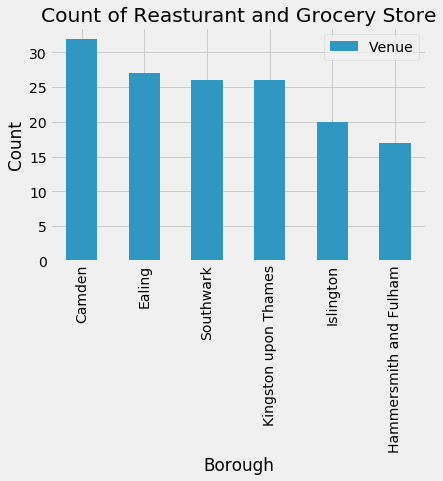

In [74]:
import matplotlib.pyplot as plt
London_venues_count.plot(color='#2F97C1',kind="bar")
plt.title("Count of Reasturant and Grocery Store")
plt.xlabel("Borough")
plt.ylabel("Count")

Text(0, 0.5, 'Count')

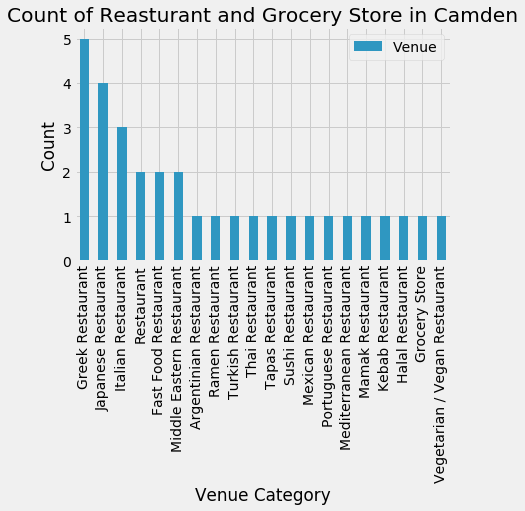

In [75]:
London_venues_count_Camden = london_GrocRestaurant.query('Borough == "Camden"')
London_venues_count_Camden = London_venues_count_Camden[['Venue Category','Venue']].groupby('Venue Category', as_index=False).count()
London_venues_count_Camden = London_venues_count_Camden.sort_values('Venue', ascending=False).set_index('Venue Category')
London_venues_count_Camden.plot(color='#2F97C1',kind="bar")
plt.title("Count of Reasturant and Grocery Store in Camden")
plt.xlabel("Venue Category")
plt.ylabel("Count")

In [76]:
London_venues_count_Camden

,Venue
Venue Category,
Greek Restaurant,5
Japanese Restaurant,4
Italian Restaurant,3
Restaurant,2
Fast Food Restaurant,2
Middle Eastern Restaurant,2
Argentinian Restaurant,1
Ramen Restaurant,1
Turkish Restaurant,1


Text(0, 0.5, 'Count')

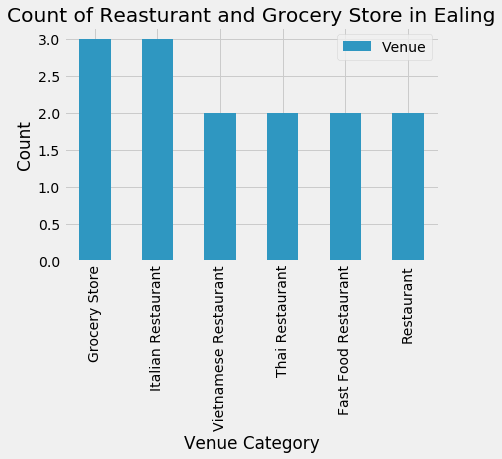

In [77]:
London_venues_count_Ealing = london_GrocRestaurant.query('Borough == "Ealing"')
London_venues_count_Ealing = London_venues_count_Ealing[['Venue Category','Venue']].groupby('Venue Category', as_index=False).count()
London_venues_count_Ealing = London_venues_count_Ealing.sort_values('Venue', ascending=False).set_index('Venue Category').head(6)
London_venues_count_Ealing.plot(color='#2F97C1',kind="bar")
plt.title("Count of Reasturant and Grocery Store in Ealing")
plt.xlabel("Venue Category")
plt.ylabel("Count")

In [78]:
London_venues_count_Ealing

,Venue
Venue Category,
Grocery Store,3
Italian Restaurant,3
Vietnamese Restaurant,2
Thai Restaurant,2
Fast Food Restaurant,2
Restaurant,2


Text(0, 0.5, 'Count')

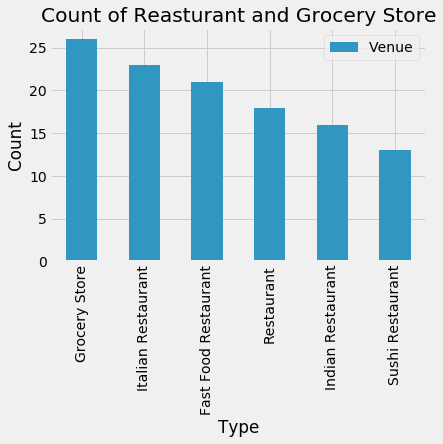

In [79]:
london_GrocRestaurant_count = london_GrocRestaurant[['Venue Category','Venue']].groupby('Venue Category', as_index=False).count()
#london_GrocRestaurant_count
london_GrocRestaurant_count = london_GrocRestaurant_count.sort_values(['Venue'], ascending=False).set_index('Venue Category').head(6)
#x = np.arange(len(london_GrocRestaurant_count['Venue Category']))
#y = london_GrocRestaurant['Venue']
#london_GrocRestaurant_count
london_GrocRestaurant_count.plot(color='#2F97C1',kind="bar")
plt.title("Count of Reasturant and Grocery Store")
plt.xlabel("Type")
plt.ylabel("Count")

In [80]:
# one hot encoding
venues_onehot = pd.get_dummies(london_GrocRestaurant[['Venue Category']], prefix="", prefix_sep="")

# add Borough column back to dataframe
venues_onehot['Borough'] = london_GrocRestaurant['Borough'] 

# move Borough column to the first column
fixed_columns = [venues_onehot.columns[-1]] + list(venues_onehot.columns[:-1])

#fixed_columns
venues_onehot = venues_onehot[fixed_columns]

venues_onehot

,Borough,Afghan Restaurant,African Restaurant,American Restaurant,Argentinian Restaurant,Asian Restaurant,Austrian Restaurant,Brazilian Restaurant,Bulgarian Restaurant,Cajun / Creole Restaurant,...,Restaurant,Romanian Restaurant,Seafood Restaurant,Spanish Restaurant,Sushi Restaurant,Tapas Restaurant,Thai Restaurant,Turkish Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant
0,Barking and Dagenham,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10,Barnet,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12,Barnet,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
14,Barnet,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
17,Barnet,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1240,Westminster,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1247,Westminster,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1254,Westminster,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1259,Westminster,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [81]:
london_groupedVenues = venues_onehot.groupby('Borough').mean().reset_index()
london_groupedVenues

,Borough,Afghan Restaurant,African Restaurant,American Restaurant,Argentinian Restaurant,Asian Restaurant,Austrian Restaurant,Brazilian Restaurant,Bulgarian Restaurant,Cajun / Creole Restaurant,...,Restaurant,Romanian Restaurant,Seafood Restaurant,Spanish Restaurant,Sushi Restaurant,Tapas Restaurant,Thai Restaurant,Turkish Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant
0,Barking and Dagenham,0.00,0.000000,0.000000,0.000000,0.000000,0.00,0.00,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,Barnet,0.00,0.000000,0.000000,0.000000,0.000000,0.00,0.00,0.000000,0.000000,...,0.222222,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,Bromley,0.00,0.000000,0.000000,0.000000,0.166667,0.00,0.00,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.166667,0.000000,0.000000,0.166667,0.000000,0.000000
3,Camden,0.00,0.000000,0.000000,0.031250,0.000000,0.00,0.00,0.000000,0.000000,...,0.062500,0.000000,0.000000,0.000000,0.031250,0.031250,0.031250,0.031250,0.031250,0.000000
4,Croydon,0.00,0.000000,0.000000,0.000000,0.111111,0.00,0.00,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.111111,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,Ealing,0.00,0.000000,0.000000,0.000000,0.037037,0.00,0.00,0.000000,0.000000,...,0.074074,0.000000,0.000000,0.037037,0.037037,0.037037,0.074074,0.000000,0.000000,0.074074
6,Enfield,0.00,0.000000,0.000000,0.000000,0.000000,0.00,0.00,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.200000,0.000000,0.000000
7,Greenwich,0.00,0.000000,0.000000,0.100000,0.000000,0.00,0.00,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.100000,0.000000,0.000000,0.000000,0.000000,0.000000
8,Hackney,0.00,0.000000,0.000000,0.000000,0.000000,0.00,0.00,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.250000,0.000000
9,Hammersmith and Fulham,0.00,0.000000,0.000000,0.000000,0.058824,0.00,0.00,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.117647,0.058824,0.058824,0.058824,0.058824,0.000000


In [82]:
london_groupedVenues.shape

(29, 50)

Now we have a dataset [london_groupedVenues] wtih vanues in each London borough. Then we will use this data to compare rent price, sale price for further clustering.

<h1 id="exploration">London Venue Exploration</h1>

What are the top 5 venues/facilities nearby profitable real estate investments?

In [83]:
num_top_venues = 5

for hood in london_groupedVenues['Borough']:
    print("----"+hood+"----")
    temp = london_groupedVenues[london_groupedVenues['Borough'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Barking and Dagenham----
                       venue  freq
0              Grocery Store   1.0
1          Afghan Restaurant   0.0
2          Polish Restaurant   0.0
3  Latin American Restaurant   0.0
4        Lebanese Restaurant   0.0


----Barnet----
                  venue  freq
0  Fast Food Restaurant  0.22
1         Grocery Store  0.22
2            Restaurant  0.22
3    Italian Restaurant  0.11
4     Indian Restaurant  0.11


----Bromley----
                   venue  freq
0  Portuguese Restaurant  0.33
1   Fast Food Restaurant  0.17
2     Turkish Restaurant  0.17
3       Asian Restaurant  0.17
4       Sushi Restaurant  0.17


----Camden----
                       venue  freq
0           Greek Restaurant  0.16
1        Japanese Restaurant  0.12
2         Italian Restaurant  0.09
3  Middle Eastern Restaurant  0.06
4       Fast Food Restaurant  0.06


----Croydon----
                venue  freq
0   Korean Restaurant  0.11
1    Malay Restaurant  0.11
2    Asian Restaurant  0.11
3  

In [84]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [85]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Borough']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
borough_venues_sorted = pd.DataFrame(columns=columns)
borough_venues_sorted['Borough'] = london_groupedVenues['Borough']

for ind in np.arange(london_groupedVenues.shape[0]):
    borough_venues_sorted.iloc[ind, 1:] = return_most_common_venues(london_groupedVenues.iloc[ind, :], num_top_venues)

borough_venues_sorted.head()

,Borough,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Barking and Dagenham,Grocery Store,Afghan Restaurant,Polish Restaurant,Latin American Restaurant,Lebanese Restaurant,Malay Restaurant,Mamak Restaurant,Mediterranean Restaurant,Mexican Restaurant,Middle Eastern Restaurant
1,Barnet,Fast Food Restaurant,Grocery Store,Restaurant,Italian Restaurant,Indian Restaurant,Chinese Restaurant,Afghan Restaurant,Malay Restaurant,Mamak Restaurant,Mediterranean Restaurant
2,Bromley,Portuguese Restaurant,Fast Food Restaurant,Turkish Restaurant,Asian Restaurant,Sushi Restaurant,Afghan Restaurant,Lebanese Restaurant,Malay Restaurant,Mamak Restaurant,Mediterranean Restaurant
3,Camden,Greek Restaurant,Japanese Restaurant,Italian Restaurant,Middle Eastern Restaurant,Fast Food Restaurant,Restaurant,Halal Restaurant,Mexican Restaurant,Portuguese Restaurant,Ramen Restaurant
4,Croydon,Korean Restaurant,Malay Restaurant,Asian Restaurant,Italian Restaurant,Indian Restaurant,Spanish Restaurant,Caribbean Restaurant,Mediterranean Restaurant,Portuguese Restaurant,New American Restaurant


<h1 id="cluster_house">Clustering</h1>

In [86]:
!pip install -U scikit-learn

In [87]:
# import k-means from clustering stage
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

We used silhouette coefficient to determine how many clusters gave a best fit for the data.
The silhouette coefficient is a measure of cluster cohesion and separation. It quantifies how well a data point fits into its assigned cluster based on two factors:

- How close the data point is to other points in the cluster
- How far away the data point is from points in other clusters

In [88]:
from sklearn.metrics import silhouette_score
kmeans_kwargs = {
    "init": "random",
    "n_init": 10,
    "max_iter": 300,
    "random_state": 42,
}
london_groupedVenues = london_groupedVenues.drop('Borough', 1)
# A list holds the silhouette coefficients for each k
silhouette_coefficients = []

# Notice you start at 2 clusters for silhouette coefficient
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(london_groupedVenues)
    score = silhouette_score(london_groupedVenues, kmeans.labels_)
    silhouette_coefficients.append(score)
silhouette_coefficients

[0.33314869953932164,
 0.1913465293912664,
 0.08997804796913018,
 0.0769109286638229,
 0.14066315582329897,
 0.07882142791447799,
 0.05355835520943133,
 0.07733923352450447,
 0.10591448454636805]

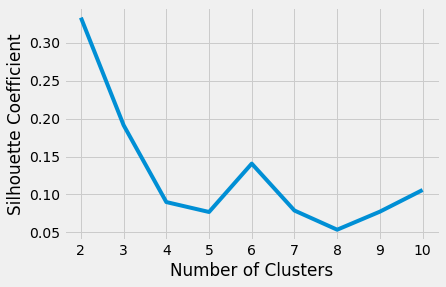

In [89]:
plt.style.use("fivethirtyeight")
plt.plot(range(2, 11), silhouette_coefficients)
plt.xticks(range(2, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

The best number of K is 3.

In [90]:
# set number of clusters
kclusters = 2

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(london_groupedVenues)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

In [91]:
borough_venues_sorted = borough_venues_sorted.merge(Borough_data, on='Borough')

# add clustering labels
borough_venues_sorted['Cluster Labels'] = kmeans.labels_

borough_venues_sorted.head()

,Borough,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Population,Latitude,Longitude,Cluster Labels
0,Barking and Dagenham,Grocery Store,Afghan Restaurant,Polish Restaurant,Latin American Restaurant,Lebanese Restaurant,Malay Restaurant,Mamak Restaurant,Mediterranean Restaurant,Mexican Restaurant,Middle Eastern Restaurant,212906,51.554117,0.150504,1
1,Barnet,Fast Food Restaurant,Grocery Store,Restaurant,Italian Restaurant,Indian Restaurant,Chinese Restaurant,Afghan Restaurant,Malay Restaurant,Mamak Restaurant,Mediterranean Restaurant,395896,51.653090,-0.200226,0
2,Bromley,Portuguese Restaurant,Fast Food Restaurant,Turkish Restaurant,Asian Restaurant,Sushi Restaurant,Afghan Restaurant,Lebanese Restaurant,Malay Restaurant,Mamak Restaurant,Mediterranean Restaurant,332336,51.402805,0.014814,0
3,Camden,Greek Restaurant,Japanese Restaurant,Italian Restaurant,Middle Eastern Restaurant,Fast Food Restaurant,Restaurant,Halal Restaurant,Mexican Restaurant,Portuguese Restaurant,Ramen Restaurant,270029,51.536388,-0.140556,0
4,Croydon,Korean Restaurant,Malay Restaurant,Asian Restaurant,Italian Restaurant,Indian Restaurant,Spanish Restaurant,Caribbean Restaurant,Mediterranean Restaurant,Portuguese Restaurant,New American Restaurant,386710,51.371305,-0.101957,0


In [92]:
# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

In [93]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=10)
# add title
loc = 'Cluster with Grocery Store and Restaurant'
title_html = '''
             <h3 align="center" style="font-size:16px"><b>{}</b></h3>
             '''.format(loc) 

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(borough_venues_sorted['Latitude'], borough_venues_sorted['Longitude'], borough_venues_sorted['Borough'], borough_venues_sorted['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster: ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=8,
        popup=label,
        color= rainbow[cluster-1],
        fill=True,
        fill_color= rainbow[cluster-1],
        fill_opacity=0.8).add_to(map_clusters)
       
map_clusters.get_root().html.add_child(folium.Element(title_html))

map_clusters

Text(0, 0.5, 'Count')

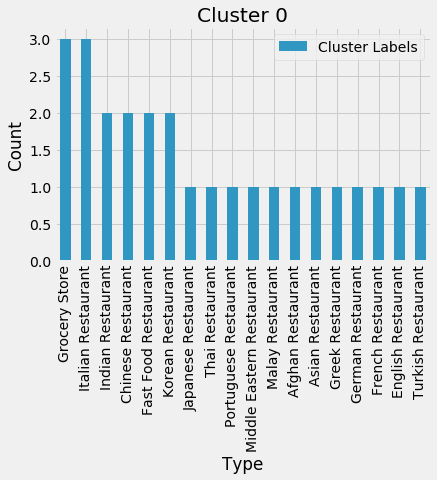

In [94]:
cluster_0 = borough_venues_sorted.loc[borough_venues_sorted['Cluster Labels'] == 0, borough_venues_sorted.columns[[1] + list(range(5, borough_venues_sorted.shape[1]))]]
#cluster_0
cluster_0 = cluster_0[['1st Most Common Venue','Cluster Labels']].groupby('1st Most Common Venue', as_index=False).count()
cluster_0 = cluster_0.sort_values(['Cluster Labels'], ascending=False).set_index('1st Most Common Venue')
cluster_0.plot(color='#2F97C1',kind="bar")
plt.title("Cluster 0")
plt.xlabel("Type")
plt.ylabel("Count")

In [95]:
borough_venues_sorted.loc[borough_venues_sorted['Cluster Labels'] == 0]

,Borough,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Population,Latitude,Longitude,Cluster Labels
1,Barnet,Fast Food Restaurant,Grocery Store,Restaurant,Italian Restaurant,Indian Restaurant,Chinese Restaurant,Afghan Restaurant,Malay Restaurant,Mamak Restaurant,Mediterranean Restaurant,395896,51.653090,-0.200226,0
2,Bromley,Portuguese Restaurant,Fast Food Restaurant,Turkish Restaurant,Asian Restaurant,Sushi Restaurant,Afghan Restaurant,Lebanese Restaurant,Malay Restaurant,Mamak Restaurant,Mediterranean Restaurant,332336,51.402805,0.014814,0
3,Camden,Greek Restaurant,Japanese Restaurant,Italian Restaurant,Middle Eastern Restaurant,Fast Food Restaurant,Restaurant,Halal Restaurant,Mexican Restaurant,Portuguese Restaurant,Ramen Restaurant,270029,51.536388,-0.140556,0
4,Croydon,Korean Restaurant,Malay Restaurant,Asian Restaurant,Italian Restaurant,Indian Restaurant,Spanish Restaurant,Caribbean Restaurant,Mediterranean Restaurant,Portuguese Restaurant,New American Restaurant,386710,51.371305,-0.101957,0
5,Ealing,Italian Restaurant,Grocery Store,Vietnamese Restaurant,Thai Restaurant,Fast Food Restaurant,Restaurant,English Restaurant,New American Restaurant,Indian Restaurant,Polish Restaurant,341806,51.512655,-0.305195,0
6,Enfield,Turkish Restaurant,Italian Restaurant,Indian Restaurant,Portuguese Restaurant,Fast Food Restaurant,Afghan Restaurant,New American Restaurant,Lebanese Restaurant,Malay Restaurant,Mamak Restaurant,333794,51.654827,-0.083599,0
7,Greenwich,Grocery Store,Japanese Restaurant,Sushi Restaurant,Italian Restaurant,Mediterranean Restaurant,French Restaurant,Portuguese Restaurant,English Restaurant,Argentinian Restaurant,Spanish Restaurant,287942,51.482084,-0.004542,0
8,Hackney,English Restaurant,Vegetarian / Vegan Restaurant,Grocery Store,Modern European Restaurant,Afghan Restaurant,Lebanese Restaurant,Malay Restaurant,Mamak Restaurant,Mediterranean Restaurant,Mexican Restaurant,281120,51.543240,-0.049362,0
9,Hammersmith and Fulham,Grocery Store,Sushi Restaurant,Portuguese Restaurant,Japanese Restaurant,Indian Restaurant,German Restaurant,Fast Food Restaurant,English Restaurant,Asian Restaurant,Turkish Restaurant,185143,51.492038,-0.223640,0
10,Haringey,Malay Restaurant,Turkish Restaurant,African Restaurant,Italian Restaurant,Bulgarian Restaurant,Indian Restaurant,Mediterranean Restaurant,Restaurant,Middle Eastern Restaurant,Polish Restaurant,268647,51.587930,-0.105410,0


Text(0, 0.5, 'Count')

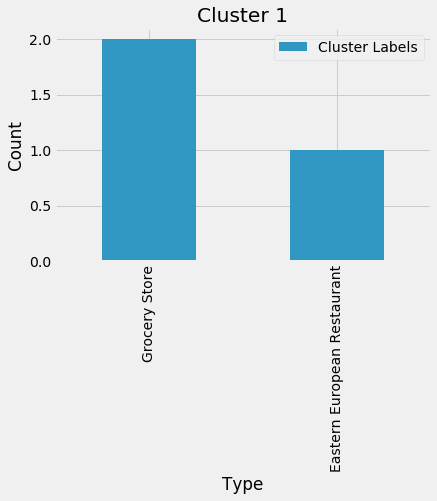

In [96]:
cluster_1 = borough_venues_sorted.loc[borough_venues_sorted['Cluster Labels'] == 1, borough_venues_sorted.columns[[1] + list(range(5, borough_venues_sorted.shape[1]))]]
cluster_1 = cluster_1[['1st Most Common Venue','Cluster Labels']].groupby('1st Most Common Venue', as_index=False).count()
cluster_1 = cluster_1.sort_values(['Cluster Labels'], ascending=False).set_index('1st Most Common Venue')
cluster_1.plot(color='#2F97C1',kind="bar")
plt.title("Cluster 1")
plt.xlabel("Type")
plt.ylabel("Count")

In [97]:
borough_venues_sorted.loc[borough_venues_sorted['Cluster Labels'] == 1]

,Borough,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Population,Latitude,Longitude,Cluster Labels
0,Barking and Dagenham,Grocery Store,Afghan Restaurant,Polish Restaurant,Latin American Restaurant,Lebanese Restaurant,Malay Restaurant,Mamak Restaurant,Mediterranean Restaurant,Mexican Restaurant,Middle Eastern Restaurant,212906,51.554117,0.150504,1
22,Redbridge,Eastern European Restaurant,Grocery Store,Portuguese Restaurant,Lebanese Restaurant,Malay Restaurant,Mamak Restaurant,Mediterranean Restaurant,Mexican Restaurant,Middle Eastern Restaurant,Modern European Restaurant,305222,51.576320,0.045410,1
26,Tower Hamlets,Grocery Store,Chinese Restaurant,Afghan Restaurant,Portuguese Restaurant,Lebanese Restaurant,Malay Restaurant,Mamak Restaurant,Mediterranean Restaurant,Mexican Restaurant,Middle Eastern Restaurant,324745,51.516700,-0.050000,1
